In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

   ## bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4 - education (categorical: "unknown","secondary","primary","tertiary")
    5 - default: has credit in default? (binary: "yes","no")
    6 - balance: average yearly balance, in euros (numeric) 
    7 - housing: has housing loan? (binary: "yes","no")
    8 - loan: has personal loan? (binary: "yes","no")
   ### related with the last contact of the current campaign:
    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
    10 - day: last contact day of the month (numeric)
    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    12 - duration: last contact duration, in seconds (numeric)
   ### other attributes:
    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    15 - previous: number of contacts performed before this campaign and for this client (numeric)
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ### Output variable (desired target):
    17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\Info teck intern\bank+marketing\bank\bank-full.csv",delimiter=';')

In [3]:
df.rename(columns={'y' : 'deposit'},inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


# Exploratory Data Analysis (EDA)

Explore the relationships between variables and identify patterns Relationship between survival and other variables

C:\Users\Asus\AppData\Local\Temp\ipykernel_10104\880208720.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


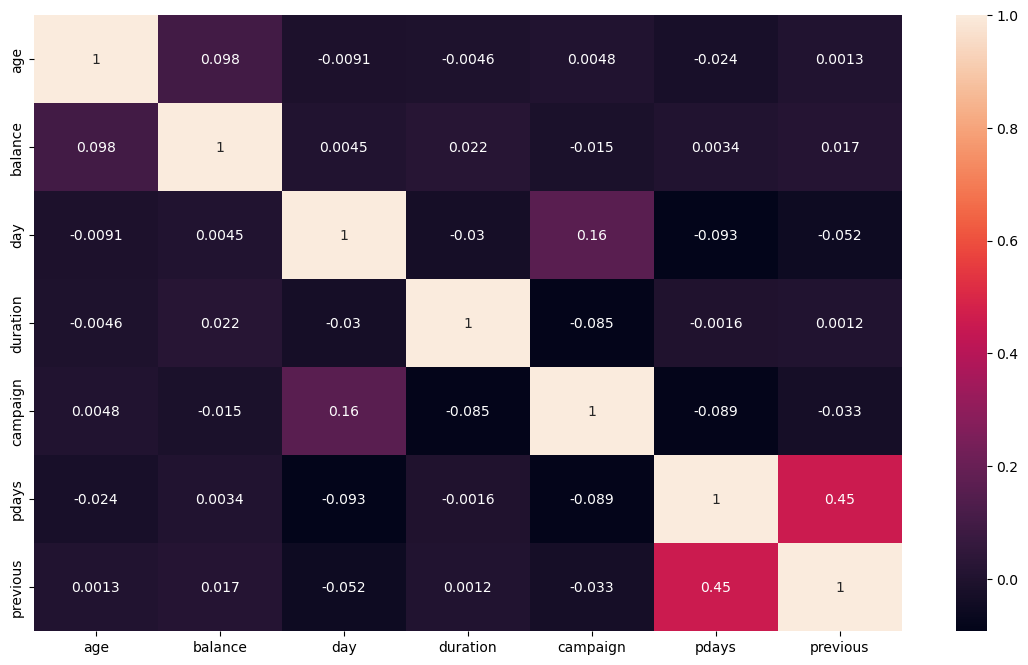

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

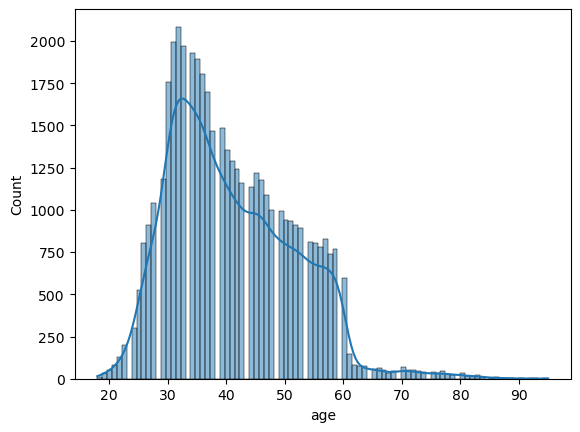

In [8]:
sns.histplot(df['age'],kde=True)

<Axes: xlabel='month', ylabel='Count'>

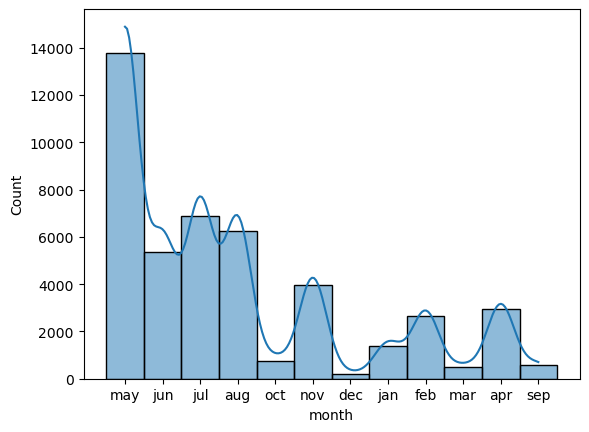

In [9]:
sns.histplot(df['month'],kde=True)

<Axes: xlabel='education', ylabel='Count'>

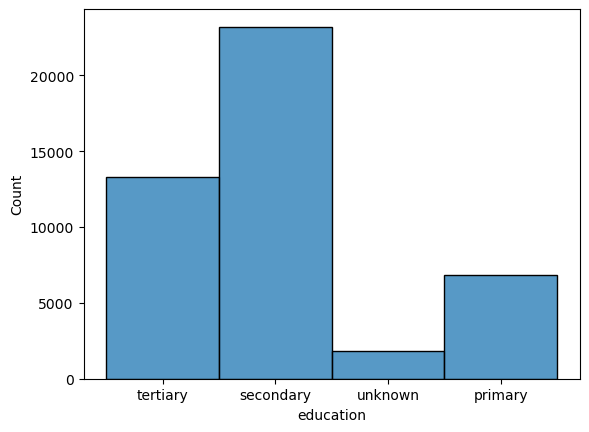

In [10]:
sns.histplot(df['education'])

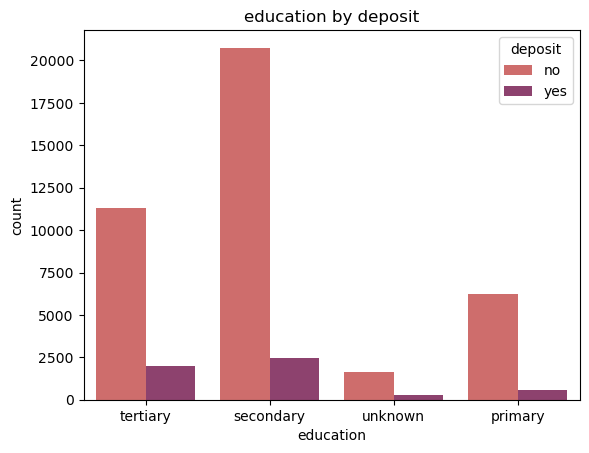

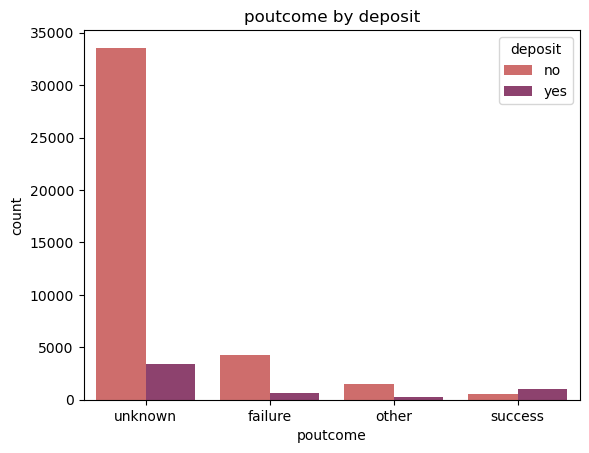

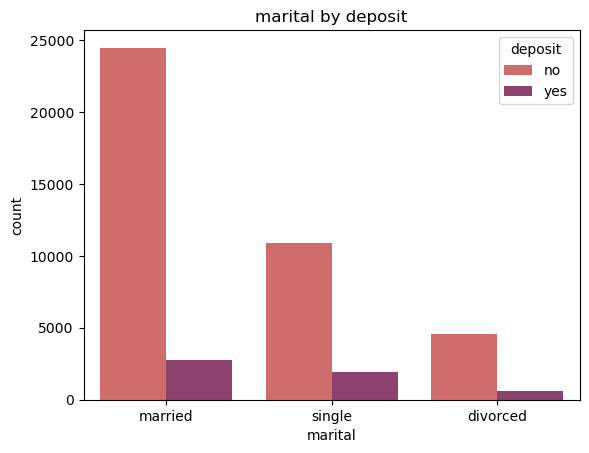

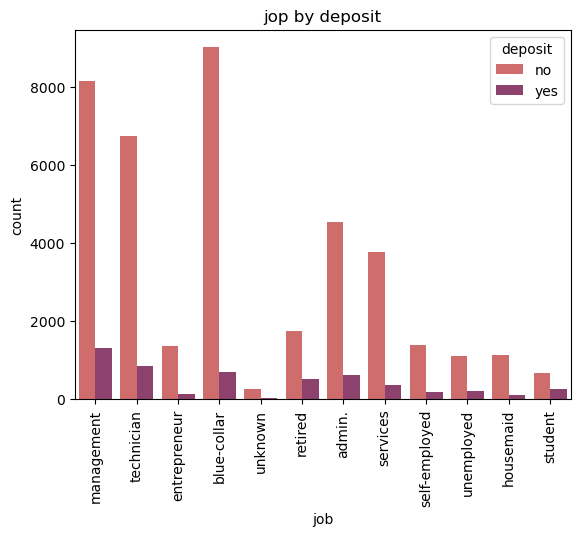

In [11]:
# education by deposit
sns.countplot(x="education", hue="deposit", data=df ,palette='flare')
plt.title("education by deposit")
plt.show()
# education by deposit
sns.countplot(x="poutcome", hue="deposit", data=df ,palette='flare')
plt.title("poutcome by deposit")
plt.show()
# marital by deposit
sns.countplot(x="marital", hue="deposit", data=df ,palette='flare')
plt.title("marital by deposit")
plt.show()
# jop by deposit
sns.countplot(x="job", hue="deposit", data=df ,palette='flare')
plt.title("jop by deposit")
plt.xticks(rotation = 90)
plt.show()

In [12]:
df['job']       = df['job'].astype('category').cat.codes.astype(int)
df['marital']   = df['marital'].astype('category').cat.codes.astype(int)
df['education'] = df['education'].astype('category').cat.codes.astype(int)
df['default']   = df['default'].astype('category').cat.codes.astype(int)
df['housing']   = df['housing'].astype('category').cat.codes.astype(int)
df['loan']      = df['loan'].astype('category').cat.codes.astype(int)
df['contact']   = df['contact'].astype('category').cat.codes.astype(int)
df['month']     = df['month'].astype('category').cat.codes.astype(int)
df['poutcome']  = df['poutcome'].astype('category').cat.codes.astype(int)
df['deposit']   = df['deposit'].astype('category').cat.codes.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  deposit    45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


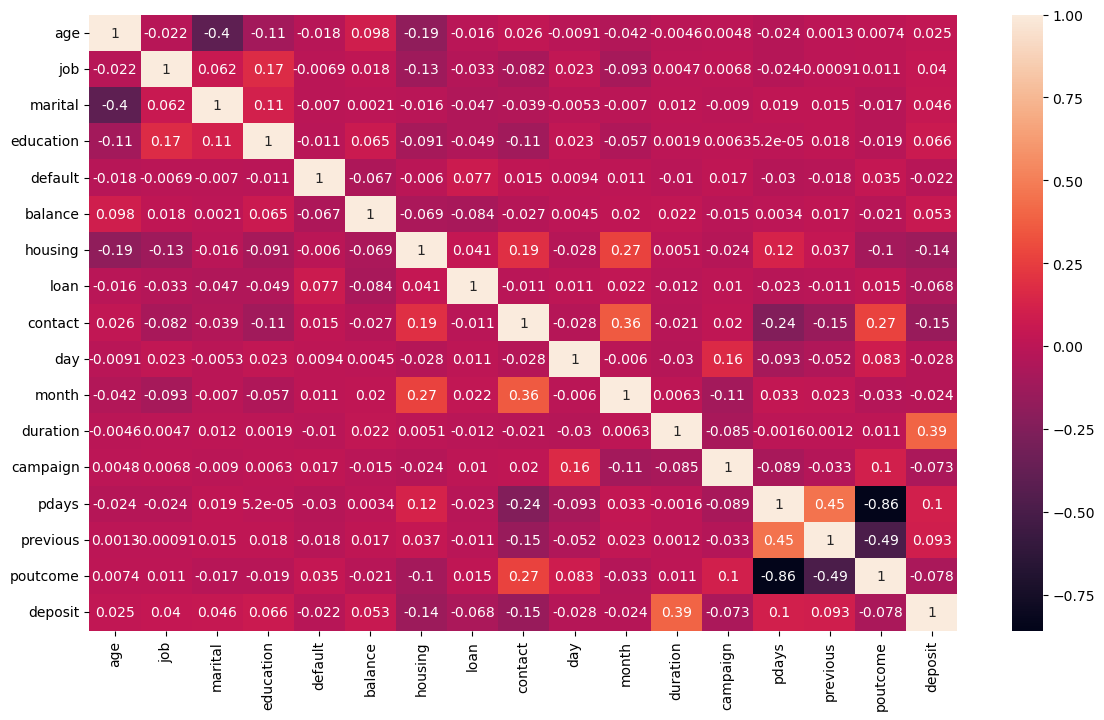

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
x = df.drop(columns=['deposit'])
y = df['deposit']

x_train , x_test , y_train ,y_test = train_test_split(x ,y ,test_size=0.3 ,random_state=48)

In [15]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [16]:
train_score = DTC.score(x_train,y_train)
test_score = DTC.score(x_test,y_test)
print('train_score : ',train_score)
print('test_score : ',test_score)

train_score :  0.9039087433248018
test_score :  0.8987024476555588


In [17]:
y_pred = DTC.predict(x_test)

In [18]:
accuracy_score(y_test,y_pred)

0.8987024476555588

In [19]:
DTC.feature_importances_

array([0.03803805, 0.        , 0.        , 0.        , 0.        ,
       0.00439593, 0.03011605, 0.        , 0.01851683, 0.01592328,
       0.11652902, 0.55213908, 0.0021573 , 0.0645851 , 0.        ,
       0.15759935])

<Axes: >

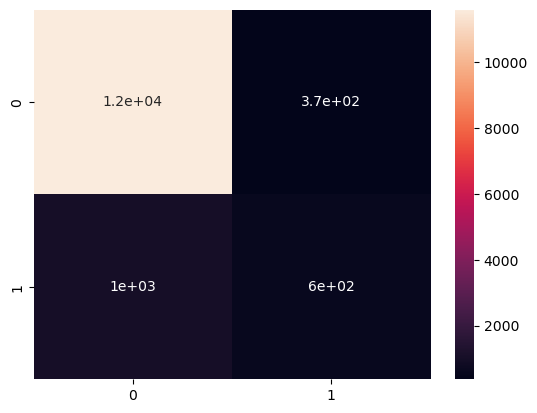

In [20]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True)

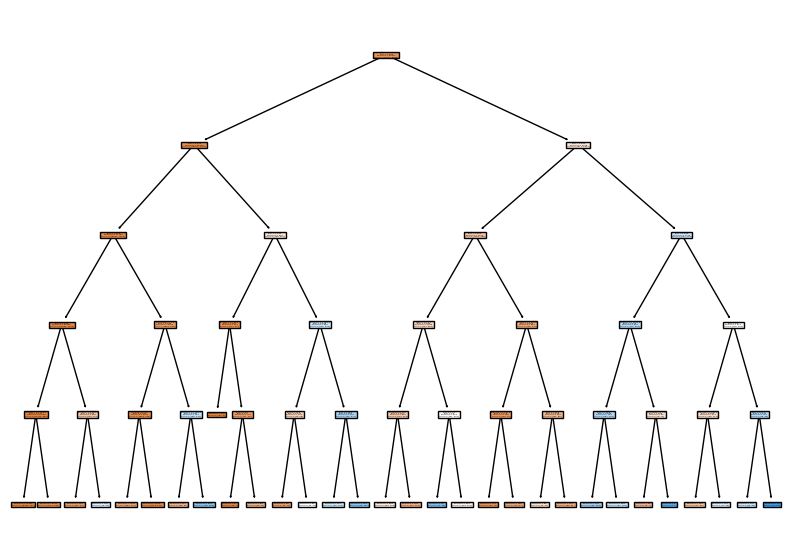

In [21]:
# Plot the decision tree
plt.figure(figsize=(10, 7))
plot_tree(DTC, filled=True, feature_names=x_train.columns.tolist())
plt.show()